# KL- UCB Algorithm

In [ ]:
import numpy as np
import math
import sys
import matplotlib.pyplot as plt
import scipy.stats as ss

p=0.5
T = 25000
k = 5
alpha = 1.5
num_sample_paths = 20
numArms = k
num_arms = 5

def select_arm(arm):
    if arm == 0:
      return np.random.binomial(1, 0.4)
    if arm == 1:
      return np.random.binomial(1, 0.3)
    if arm == 2:
      return np.random.binomial(1, 0.5)
    if arm == 3:
      return np.random.binomial(1, 0.5)
    if arm == 4:
      return np.random.binomial(1, 0.1)
  


def divergence(p,q):
	if p==0:
		if q==1:
			return math.inf
		else:
			return (1-p)*math.log((1-p)/(1-q))

	elif p==1:
		if q==0:
			return math.inf
		else:
			return p*math.log(p/q)
	else:
		return (p*math.log(p/q)+(1-p)*math.log((1-p)/(1-q)))

def updateQMax(counts, rounds_until_now, mu_hat):
  #eMeanUpdate(reward, pArmPulled);
	delta = 1e-2;
	epsilon = 1e-4;
	qMax = np.zeros(numArms)
	for i in range(numArms):
		p = mu_hat[i]
		prev = p
		end = 1
		if p==1:
			qMax[i] = 1
		else:
			while 1:
				mid = (prev+end)/2
				kl = divergence(p,mid)
				rhs = np.log(rounds_until_now)/counts[i]
				if abs(kl - rhs) < epsilon:
					break
				if kl-rhs<0:
					prev = mid
				else:
					end = mid
			qMax[i] = mid
	return qMax

In [ ]:
def kl_ucb(num_arms, total_rounds):
	k = num_arms
	eps = [0]*k
	qMax = np.zeros(k) 
	counts = np.zeros(k)
	values = np.zeros(k)
	loss = np.zeros(k)
	x = np.zeros(k)
	nx = np.ones(k)
	max_mu = p
	# min_mu
	cumulativeReward = 0
	mu_hat = np.zeros(k)

	regret = np.zeros(total_rounds)
	

	for explore in range(k):
		It = explore
		reward = select_arm(It)
		values[It] += reward
		loss[It] += 1-reward
		counts[It] +=1
		cumulativeReward += reward
		
	mu_hat = values/counts
	qMax = updateQMax(counts, k, mu_hat)

	for t in range(k, total_rounds):

		qMax = updateQMax(counts, t, mu_hat)
		Aj = np.argmax(qMax)
		reward = select_arm(Aj)
		values[Aj] += reward
		counts[Aj] += 1

		mu_hat = values/counts
		cumulativeReward += reward

		regret[t] += regret[t-1] + max_mu -(mu_hat[Aj])

	return regret

In [ ]:
#cum_regret1 = []
#cum_regret2 = []
cum_regret3 = []
#cum_regret4 = []

for i in range(num_sample_paths):
	#cum_regret1.append(e_greedy(T))
	#cum_regret2.append(ucb(k,T))
	cum_regret3.append(kl_ucb(k,T))
	#cum_regret4.append(thompson(k,T))


In [ ]:
time = 100*np.arange(T/100)
freedom_degree = len(time) - 1 #250 - 1


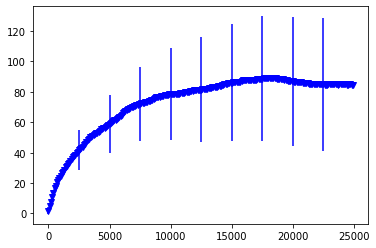

In [ ]:
regret_mean = []
regret_err = []
t1=int(T/100)
R = np.zeros((num_sample_paths, t1))
for j in range(num_sample_paths):
	for i in range(t1):
		R[j][i] = cum_regret3[j][100*(i+1)-1]

regret_mean = R.mean(axis=0)
for i in range(t1):
	regret_err.append(ss.t.ppf(0.95, freedom_degree) * ss.sem(R[:,i]))
	regret_err[i] = regret_err[i]*(i%25==0)

colors = list("rgbcmyk")
shape = ['--^', '--d', '--v', '--x']

plt.errorbar(time, regret_mean, regret_err, color=colors[2])
plt.plot(time, regret_mean, colors[2] + shape[2], label='kl_ucb')